# --------------------------------------- Workshop #4 -------------------------------------


* This workshop includes marked tasks that comprise 15% of your final mark in this module. 

* You need to read the examples in Lecture #4 and Lecture #4 exercise to complete the tasks. 

# Tasks

## TASK 4.1:  Download the adult_WS4 dataset. Apply K-Means and Hierarchical clustering to three optional columns in the dataset. Find the optimum number of clusters for both clustering methods (10%).

## NOTE: You should comment on your code wherever necessary and briefly explain what the code is doing

## importing necessary liberaries

In [1]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################

import pandas as pd
import numpy as np

import warnings

# this code  filters the warning error but doesn’t have any impact on the dataset 
warnings.filterwarnings('ignore')

## importing the dataset

In [2]:
data=pd.read_csv('adult_WS4.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


## Cleaning and Exploring the Dataset

In [3]:
data.shape

(10000, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       9825 non-null   object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      9825 non-null   object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  9939 non-null   object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [5]:
data.isna().sum()

age                 0
workclass         175
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        175
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     61
income              0
dtype: int64

In [6]:
 # Droping row with Null values 
data.dropna(inplace=True)

In [15]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,Private,63363,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9996,53,Private,58535,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9997,30,Private,342709,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9998,41,Self-emp-not-inc,134724,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K


### Preparing the dataset for clustering

In [7]:
from sklearn.preprocessing import StandardScaler


# Select the three columns. 
columns = ['age', 'education-num', 'hours-per-week']
data_selected = data[columns]

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)


## Applying K-Means Clustering with Elbow Method

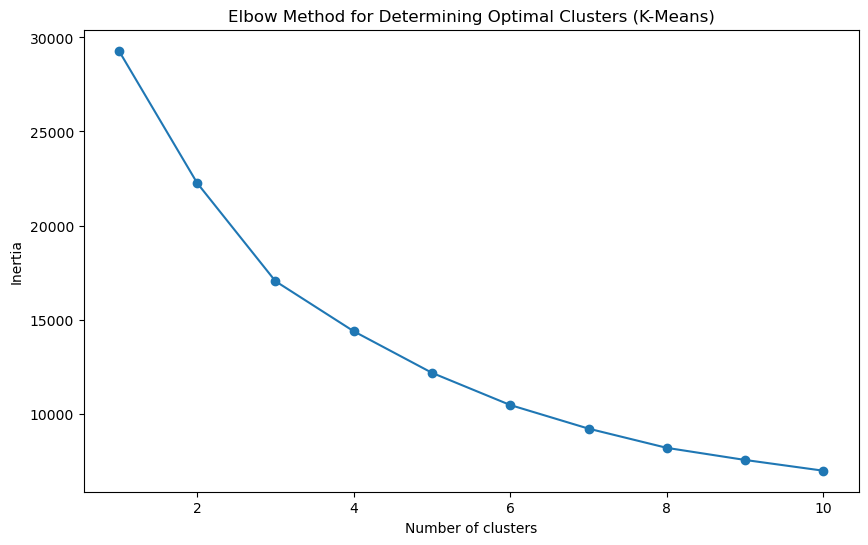

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Determining Optimal Clusters (K-Means)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [9]:
# according to the elbow figure above  3  optimal number of clusters was identified
kmeans_optimal = KMeans(n_clusters=3, random_state=42)
kmeans_optimal.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

### Determining the Optimum Number of Clusters for Hierarchical Clustering

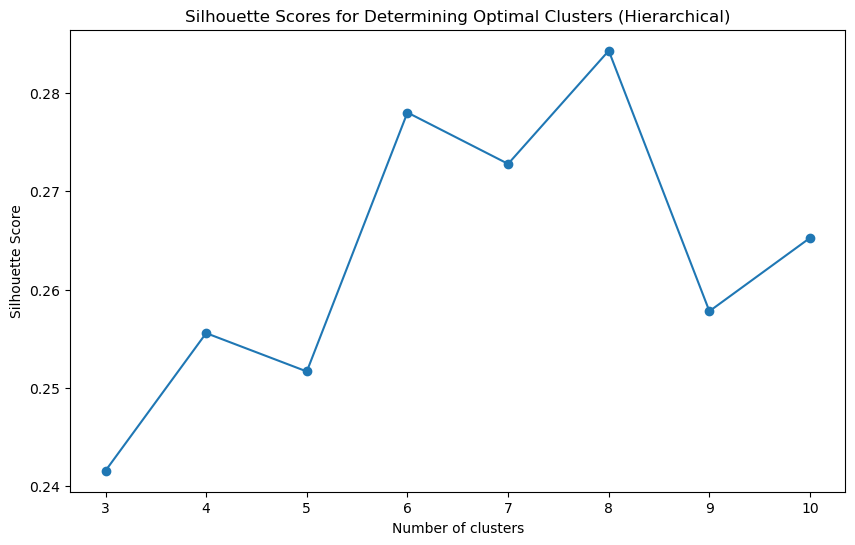

In [15]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(3, 11):  
    agg_clustering = AgglomerativeClustering(n_clusters=k).fit(data_scaled)
    score = silhouette_score(data_scaled, agg_clustering.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Determining Optimal Clusters (Hierarchical)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [16]:
# the optimal number of clusters was found
agg_clustering = AgglomerativeClustering(n_clusters=3).fit(data_scaled)
data['hierarchical_cluster'] = agg_clustering.labels_


## Task 4.2: Apply the PCA method to the dataset and extract the first two principal components (n_components=2). Plot the scatter plot of the dataset's first two components for the two classes of the income column (5%). 

## NOTE 1: You should comment on your code wherever necessary and briefly explain what the code is doing.

## NOTE 2: You need to encode the categorical columns, normalise the dataset, and remove the income column before applying the PCA method. 

## HINT: See the examples in the last three slides in Lecture #4 or the Lecture #4 exercise notebook

In [17]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################

import pandas as pd
import numpy as np
import warnings


# this code  filters the warning error but doesn’t have any impact on the dataset 

warnings.filterwarnings('ignore')


In [18]:
data=pd.read_csv('adult_WS#3.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


### Cleaning and Exploring the Dataset

In [19]:
data.shape

(10000, 15)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       9825 non-null   object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      9825 non-null   object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  9939 non-null   object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [23]:
 # Droping row with Null values 
data.dropna(inplace=True)

In [24]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,Private,63363,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9996,53,Private,58535,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9997,30,Private,342709,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9998,41,Self-emp-not-inc,134724,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K


In [27]:
# Dropping fnlwgt column
data = data.drop(['fnlwgt'], axis=1)

In [28]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,19,Private,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9761,53,Private,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9762,30,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9763,41,Self-emp-not-inc,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K


In [29]:
# Reindexing the original data
data.reset_index(drop=True, inplace=True)

In [30]:
# Printing the dataset after reindexing
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,19,Private,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9761,53,Private,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9762,30,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9763,41,Self-emp-not-inc,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K


In [31]:
# Extracting input and output data
X=data.drop('income',axis=1)
y=data.iloc[:,13]

In [32]:
y

0        >50K
1       <=50K
2       <=50K
3        >50K
4       <=50K
        ...  
9760    <=50K
9761    <=50K
9762    <=50K
9763     >50K
9764    <=50K
Name: income, Length: 9765, dtype: object

In [33]:
# Encoding the input data
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X=encoder.fit_transform(X)

In [34]:
X

array([[12.,  4., 12., ...,  0., 39., 38.],
       [19.,  4., 15., ...,  0., 44., 38.],
       [ 8.,  0.,  9., ...,  0., 24., 38.],
       ...,
       [13.,  4., 11., ...,  0., 39., 38.],
       [24.,  6.,  8., ...,  0., 39., 38.],
       [ 4.,  4., 15., ...,  0., 39., 38.]])

In [35]:
# Normalising the input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [36]:
X

array([[0.17391304, 0.5       , 0.8       , ..., 0.        , 0.45348837,
        0.95      ],
       [0.27536232, 0.5       , 1.        , ..., 0.        , 0.51162791,
        0.95      ],
       [0.11594203, 0.        , 0.6       , ..., 0.        , 0.27906977,
        0.95      ],
       ...,
       [0.1884058 , 0.5       , 0.73333333, ..., 0.        , 0.45348837,
        0.95      ],
       [0.34782609, 0.75      , 0.53333333, ..., 0.        , 0.45348837,
        0.95      ],
       [0.05797101, 0.5       , 1.        , ..., 0.        , 0.45348837,
        0.95      ]])

In [54]:
from sklearn.decomposition import PCA
import pandas as pd

# make X your feature matrix without the 'income' column
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

In [55]:
X_df

,principal component 1,principal component 2
0,0.916914,0.101631
1,-0.418342,0.270718
2,0.974697,0.480632
3,-0.449293,0.062430
4,-0.414672,0.215872
...,...,...
9760,0.752265,-0.423911
9761,0.445006,-0.470399
9762,-0.421065,0.078008
9763,0.862923,-0.207219


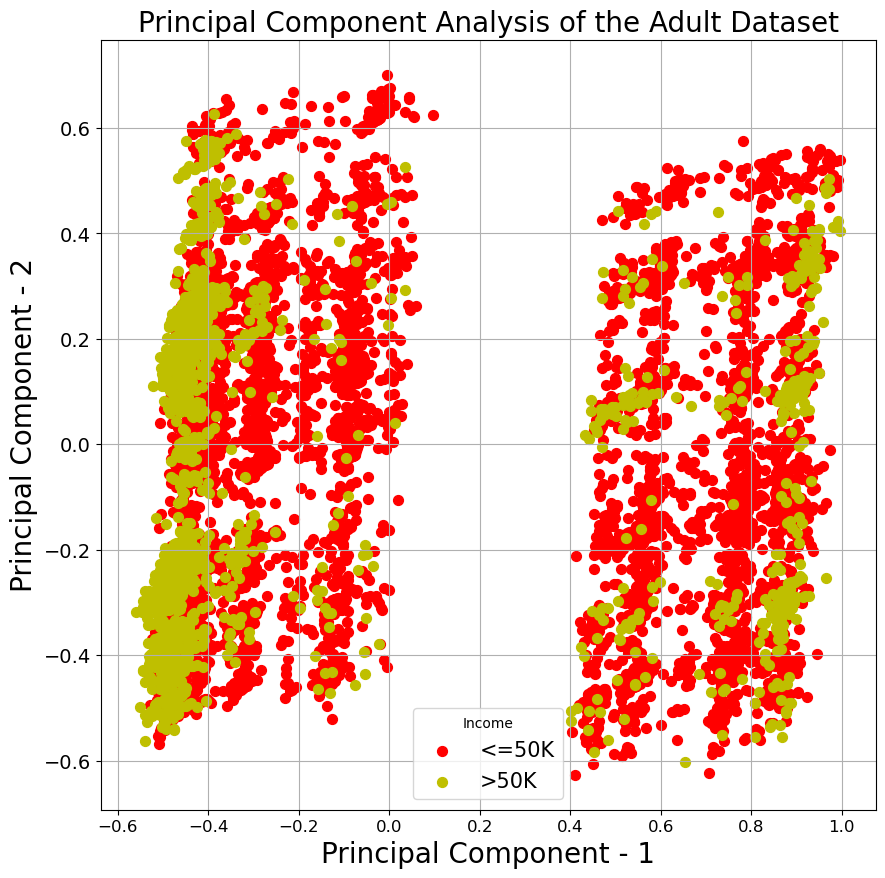

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title("Principal Component Analysis of the Adult Dataset", fontsize=20)

# target income, including case sensitivity
targets_income = ['<=50K', '>50K']
colors = ['r', 'y']

for target, color in zip(targets_income, colors):
    # filter the indices based on the income category from the original dataset
    indicesToKeep = data['income'] == target
    plt.scatter(X_df.loc[indicesToKeep, 'principal component 1'], 
                X_df.loc[indicesToKeep, 'principal component 2'], c=color, s=50)

# Correct the legend to accurately reflect the income categories and their colors
plt.legend(['<=50K', '>50K'], prop={'size': 15}, title='Income')
plt.grid(True)
plt.show()